### Проверить работу YOLOv7 

In [ ]:
# Clone source code YOLOv7 
%cd /content/drive/MyDrive/mipt/Нир/yolov7_train
!git clone https://github.com/WongKinYiu/yolov7

In [ ]:
%cd /content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
!python detect.py --weights pretrain/yolov7.pt --source test_images/15271255494_fcc90d3f9b_k.jpg

/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/15271255494_fcc90d3f9b_k.jpg', update=False, view_img=False, weights=['pretrain/yolov7.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defin

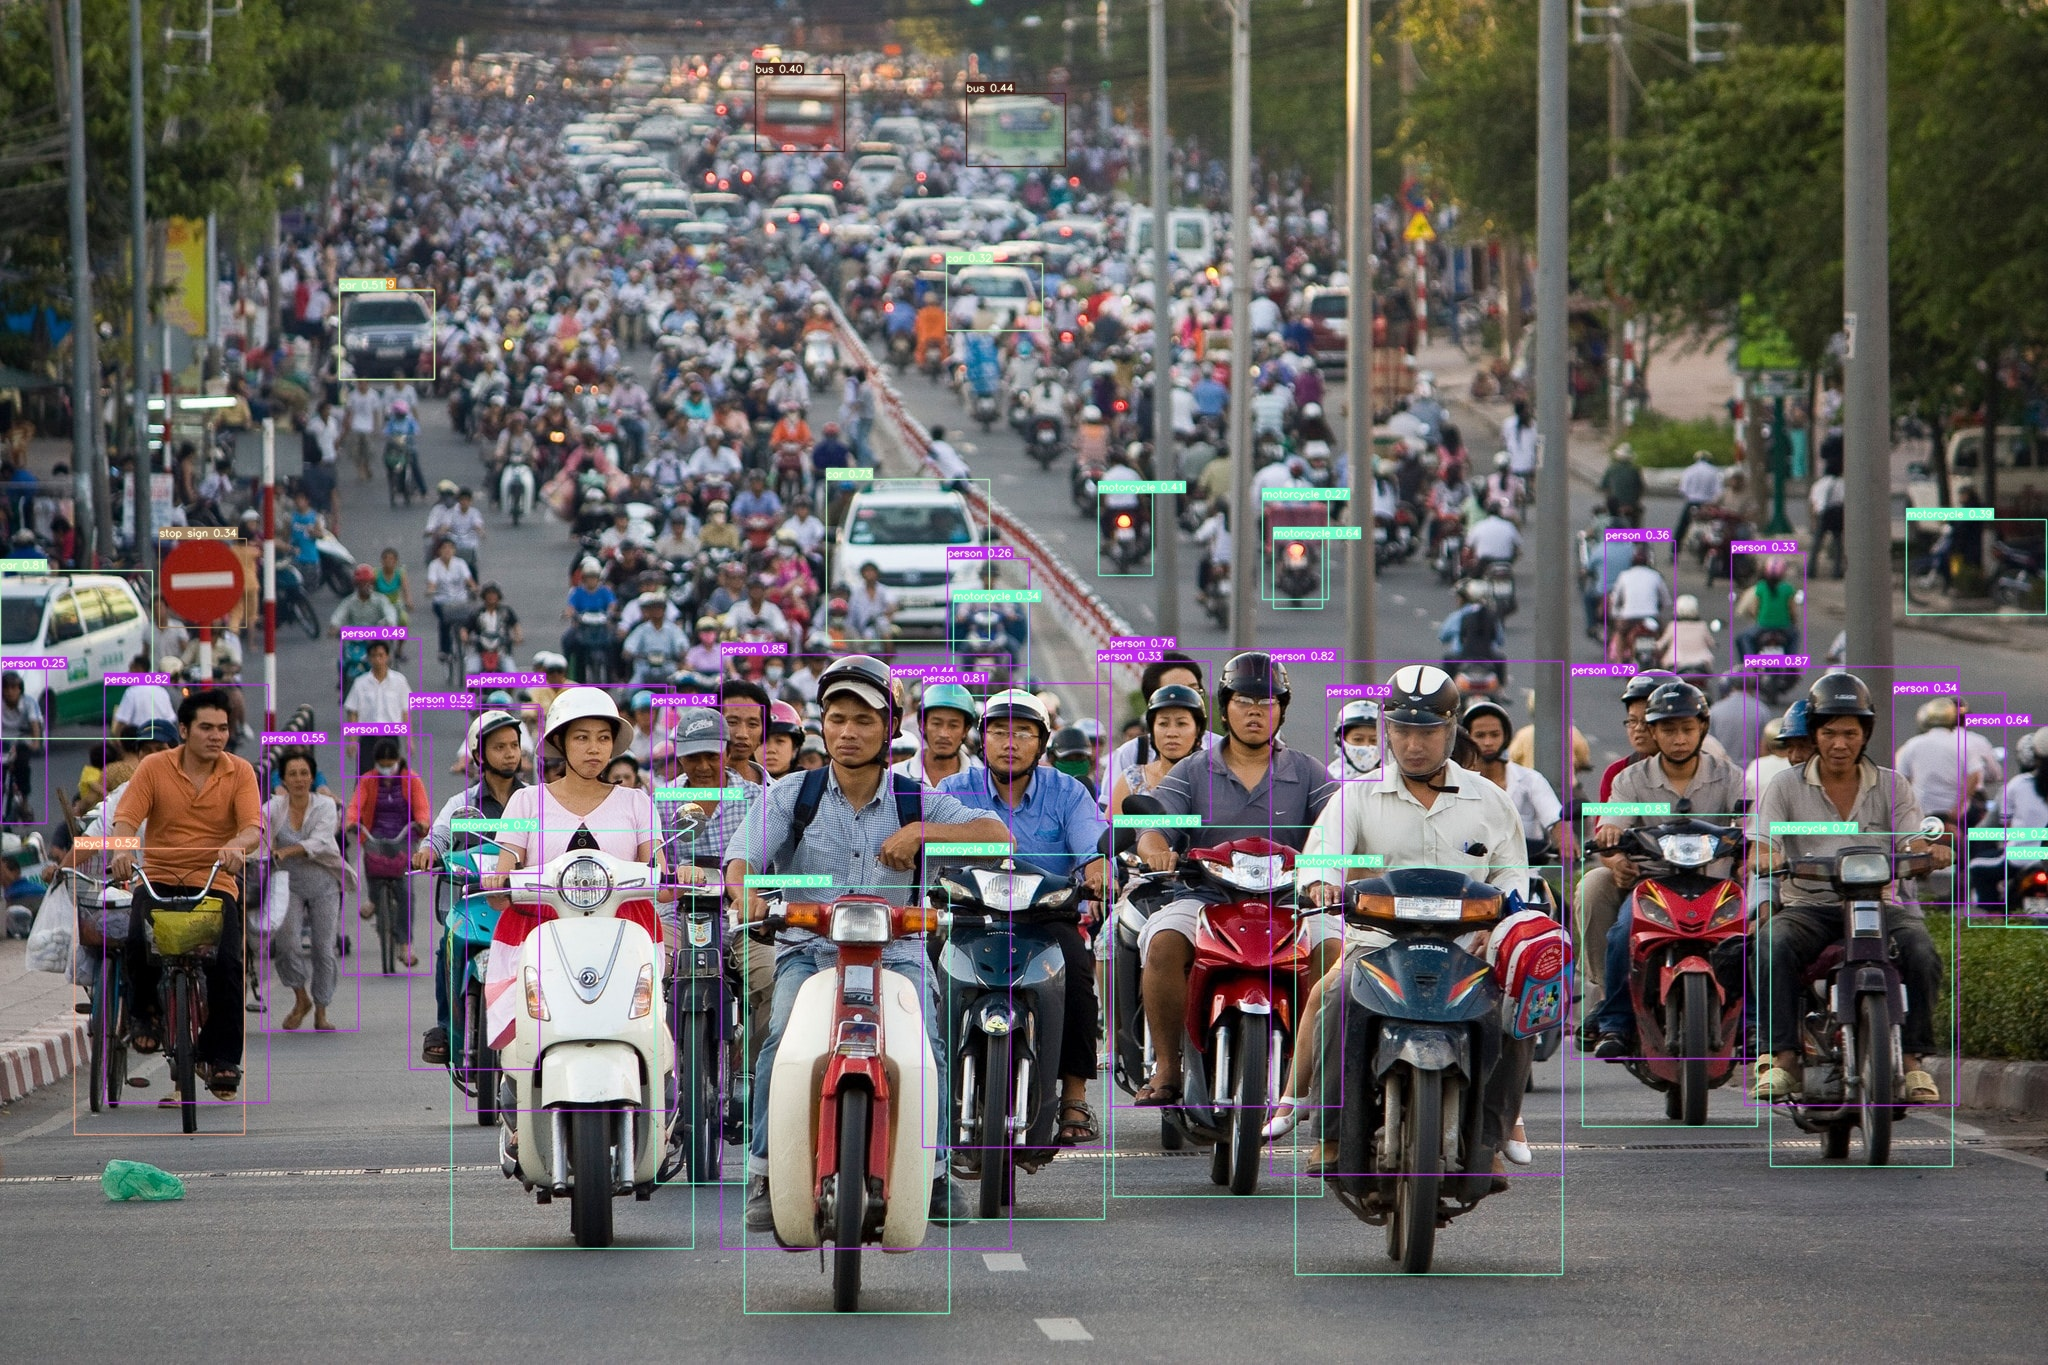

In [ ]:
from IPython.display import Image, display
display(Image(filename="//content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7/runs/detect/exp/15271255494_fcc90d3f9b_k.jpg"))

Вроде он рвботает нормально

### Train yolov7 

Реорганизовать каталог для выполнения программы обучения train_data for yolov7
1. train
 - images -- file .jpg
 - labels -- file .txt
2. test
 - images -- file .jpg
 - labels -- file.txt

объявить файл yaml. Исходный датасет имеет только один класс

In [ ]:
%cd /content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
!rm data/mydataset.yaml 
!echo 'train: ../train_data/train' >> data/mydataset.yaml
!echo 'val: ../train_data/train' >> data/mydataset.yaml
!echo 'nc: 1' >> data/mydataset.yaml
!echo "names: ['car']" >> data/mydataset.yaml

/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7


Train model YOLOv7. Сделал 10 epochs так как GPU colab не может подключится. Результат плохий но вроде он работает. mAP0.5 = 0.003 

In [ ]:
%cd /content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
!python train.py --batch 8 --cfg cfg/training/yolov7.yaml --epochs 10 --data data/mydataset.yaml --weights 'pretrain/yolov7.pt'

/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CPU

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='cfg/training/yolov7.yaml', data='data/mydataset.yaml', device='', entity=None, epochs=10, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp10', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='pretrain/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=

Тест на изображение в  test

In [ ]:
%cd /content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7/
!python detect.py --weights /content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7/runs/train/exp10/weights/last.pt --source test_images/test.jpg

/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='test_images/test.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7/runs/train/exp10/weights/last.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.13.0+cu116 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return

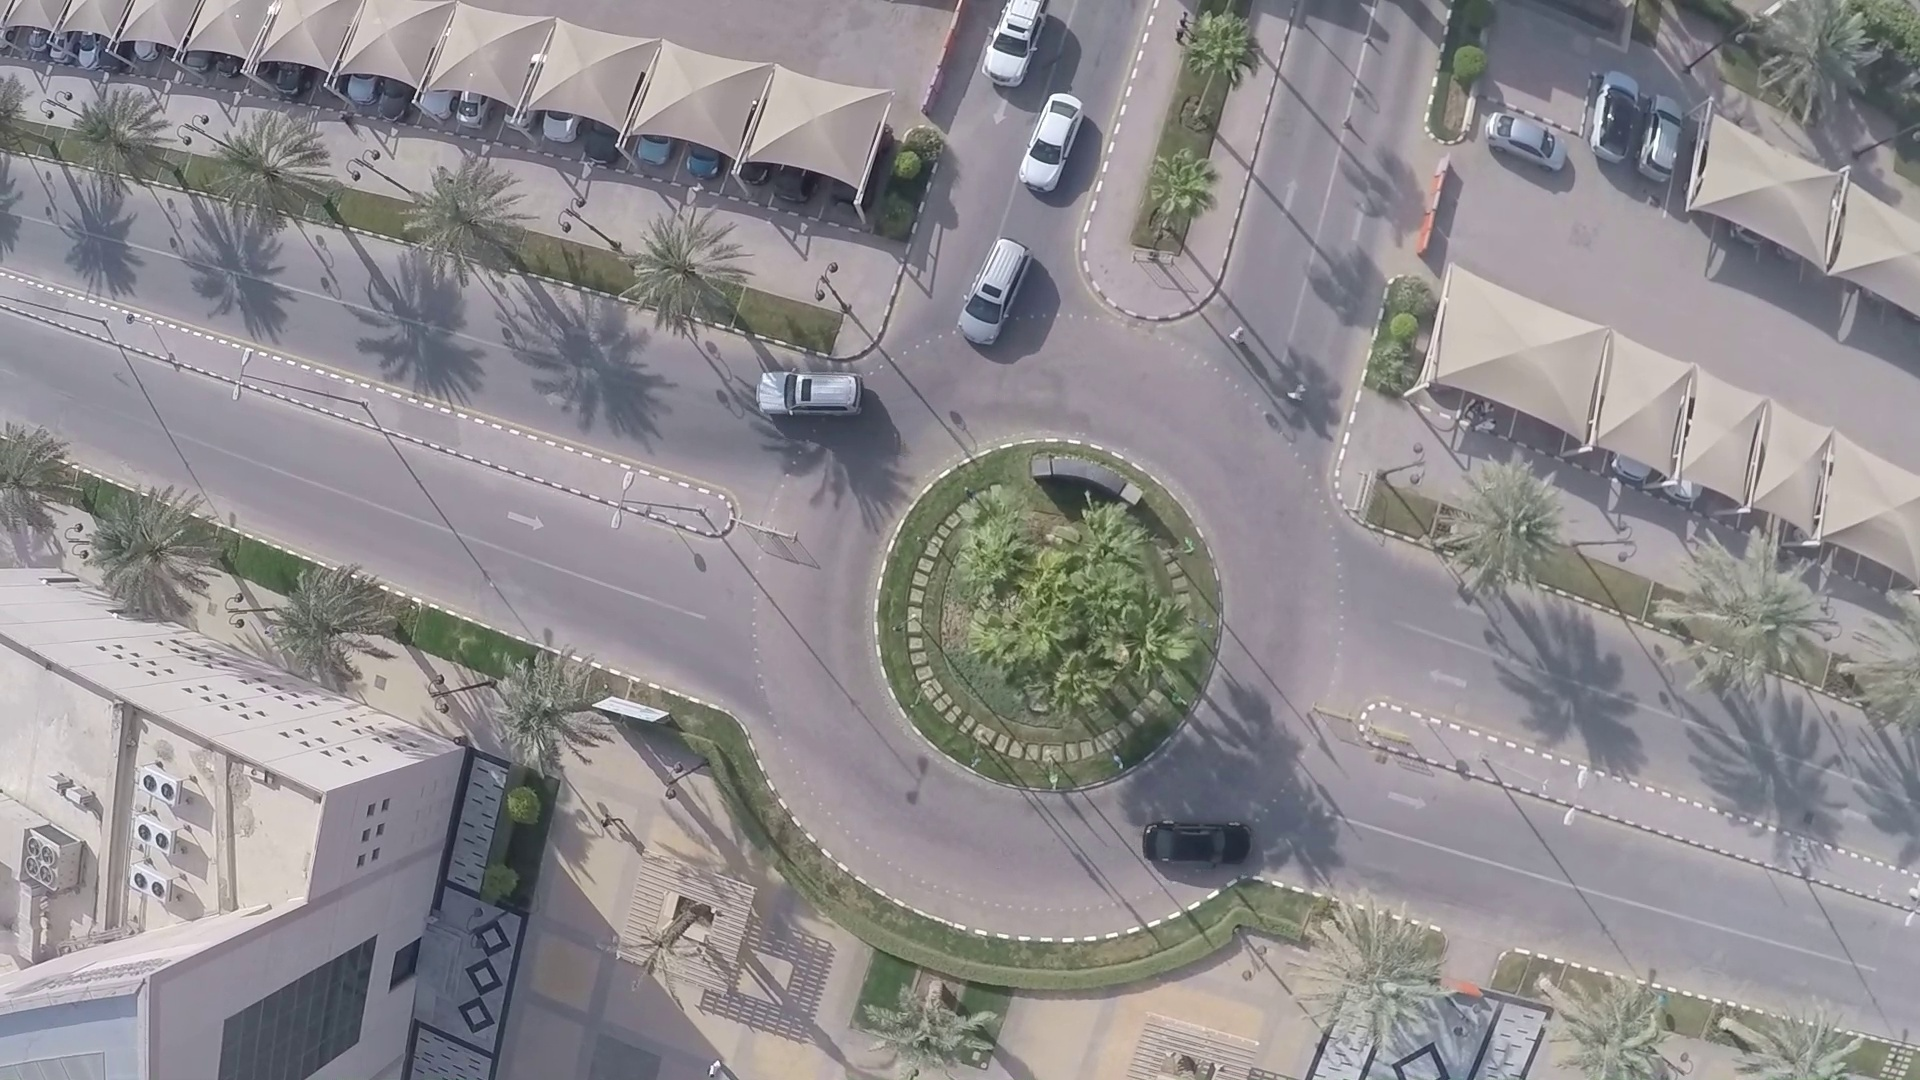

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/mipt/Нир/yolov7_train/yolov7/runs/detect/exp11/test.jpg"))

результат еще ничего, потому что количество epochs слишком мало. В результате должно получиться как на картинке ниже.

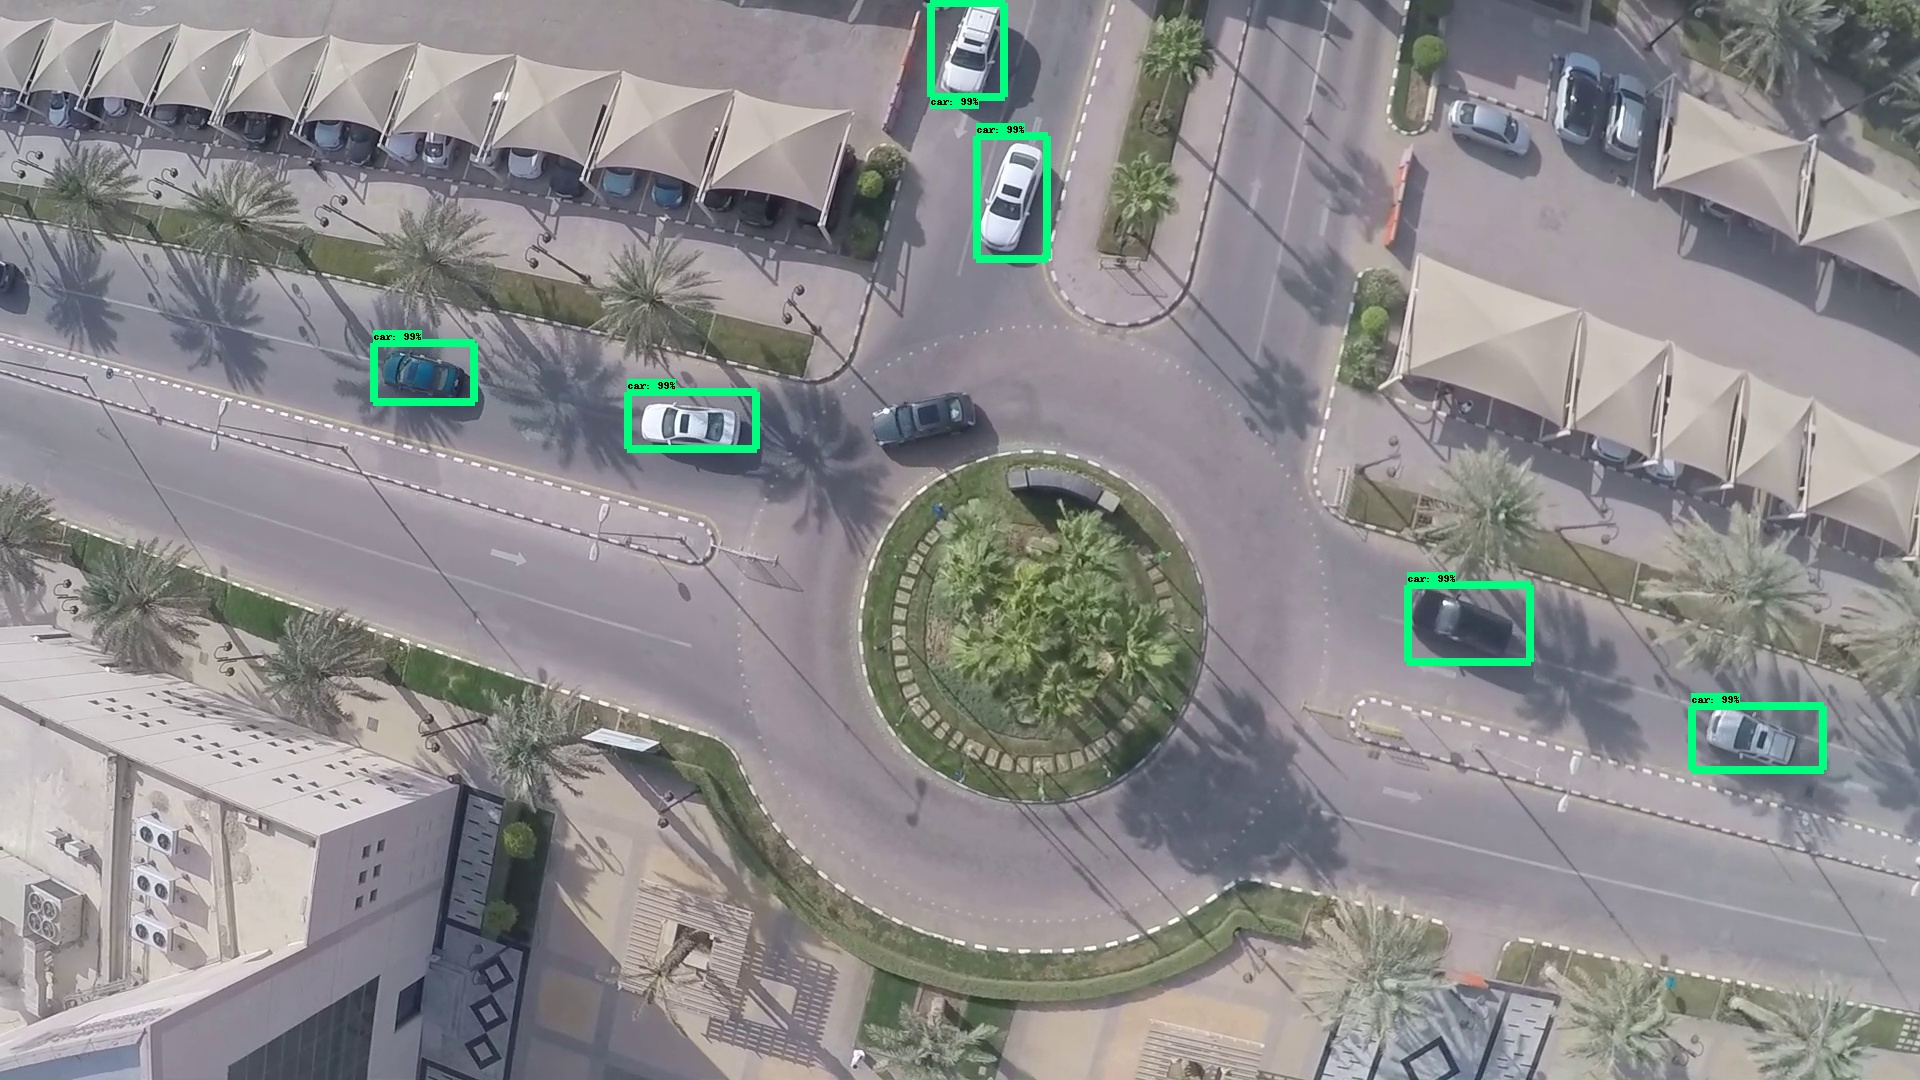

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/mipt/Нир/yolov7_train/sample.jpg"))